# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## IMPORTANT: Guidelines for a proper conduct of the exercises
1. you should create code that is correct, simple, well organized, indented, commented, which uses self-explanatory names for variables and that is numerically efficient.
2. I expect a responsible interaction during the exercises: the questions should be more related to the conduction of the exercises and to the meaning of the results obtained than to the computational problems. Bugs are usual in coding; for this reason, sooner or later, one should learn to deal with them by oneself ... if you'll be able to, it will be your main achievement in this Laboratory!

## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

Il generatore di numeri pseudo-casuali restituisce una sequenza di numeri distribuiti uniformemente nell'intervallo $\left[ 0,1 \right]$. Il valore medio di questa distribuzione sarà quindi dato da:
$$ \langle r \rangle = \int_0^1 r dr = \frac{1}{2}. $$

Per verificare quindi che i numeri generati seguano effettivamente questa distribuzione, estraggo $M = 10^6$ variabili casuali $r_j$. 
Per poter valutare gli errori della stima utilizzo il metodo delle medie a blocchi, suddividendo i punti considerati in $N=100$ blocchi e dando delle stime delle grandezza $\langle r \rangle$ su ciascuno di essi. In questo modo si può fare un'analisi statistica su quantità non più correlate. Calcolo dunque la media di queste stime su un numero progressivo di blocchi.

All'aumentare di $N$ le medie devono convergere al valore atteso di $1/2$ e che gli errori di ciascuna di queste stime devono diminuire prograssivamente.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

from scipy.stats import norm
from scipy.stats import cauchy

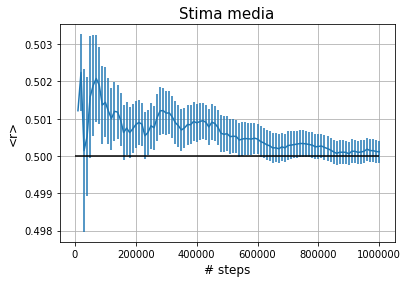

In [2]:
N, sum_prog, err_prog = np.loadtxt("Es01.1/risultati_01.1.1.dat", usecols=(0,1,2), delimiter=' ', unpack=True)

plt.errorbar(N,sum_prog,yerr=err_prog)
plt.hlines(0.5, 0, N[-1])
plt.xlabel('# steps', size=12)
plt.ylabel('<r>', size=12)
plt.title('Stima media', size=15)
plt.grid(True)
plt.show();

Si osserva che nei blocchi iniziali la stima della media $\langle r \rangle$ oscilla fortemente ed è caratterizzata da un'ampia incertezza. Come previsto all'aumentare di $N$ il valore della media converge evidentemente a $\frac{1}{2}$ e la sua incertezza diminuisce.

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties).

Per testare che la varianza dei numeri estratti dal generatore pseudo casuale sia quella attesa considero gli stessi $M=10^6$ numeri generati in precenza. Analogamente a quanto eseguito prima calcolo la varianza sui punti di ciascuno degli $N=100$ blocchi, per poi calcolare la media delle stime ottenute.

Mi aspetto che all'aumentare di $N$ tali medie convergano al valore atteso di $1/12$ e che l'errore di ciascuna di essa diminuisca prograssivamente.

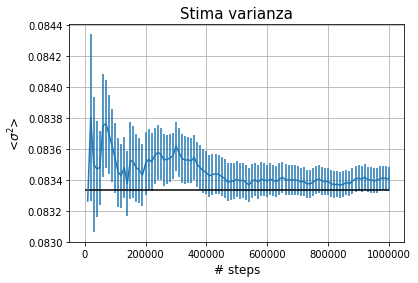

In [3]:
N, sum_prog, err_prog = np.loadtxt("Es01.1/risultati_01.1.2.dat", usecols=(0,1,2), delimiter=' ', unpack=True)

plt.errorbar(N,sum_prog,yerr=err_prog)
plt.hlines(1/12, 0, N[-1])
plt.xlabel('# steps', size=12)
plt.ylabel('<$\sigma^2$>', size=12)
plt.title('Stima varianza', size=15)
plt.grid(True)
plt.show();

Si osserva che nei blocchi iniziali la stima della media $\langle \sigma^2 \rangle$ oscilla fortemente ed è caratterizzata da un'ampia incertezza. All'aumentare di $N$ il valore della media converge a $\frac{1}{12}$ entro $1\sigma$ e la sua incertezza diminuisce.

The hypothesis is that the numbers $r$ are drawn from a uniform distribution. In Statistics we cannot prove that some random events are drawn from a particular distribution (Note, in fact, that such hypothesis is false: pseudo-random numbers are drawn from a deterministic algorithm!); we can try to estimate the probability that $r$ **are not** drawn from a uniform distribution. If this probability is low, we can safely reject this last hypothesis.
<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
Pearson's cumulative test statistic $\chi^2$ is a measure of the error between observations, $O_i$, and expected values, $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
The numerator is a squared distance between observations, $O_i$, and expected values, $E_i$, and thus should be compared (at the denominator) with the expected squared fluctuations (variance) of the relative distribution. Why variance = $E_i$? 
The probability of getting exactly $k$ (independent) successes, each one with probability $p$, in $n$ trials is given by the Binomial distribution (see <a href="https://en.wikipedia.org/wiki/Binomial_distribution">this Wikipedia link</a>):
$$Pr(X=k) = {{n}\choose{k}} p^k (1-p)^{n-k} = \frac{n!}{k! (n-k)!} p^k (1-p)^{n-k}$$
The average of the Binomial distribution is $\langle X \rangle = np$, the variance is: $\sigma^2 = np (1-p)$. Thus if $p$ is small we have that $\sigma^2 \simeq np$, that is $\sigma^2 \simeq \langle X \rangle$ and this explains the denominator $E_i$ in $\chi^2$
</p>

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely.

Verifico se il generatore di numeri pseudo-casuali estrae variabili distribuite secondo la stessa distribuzione anche dopo un numero grande di iterazioni. Per fare ciò suddivido l'intervallo $\left[0,1 \right]$ in $M=100$ sottointervalli, che utilizzo per calcalore il $\chi^2$ confrontando il numero di estrazioni in quel sottointervallo rispetto al valore atteso.

Suddividendo la sequenza iniziale di $10^6$ numeri casuali in $100$ intervalli temporali e stimando il $\chi^2$ su ciascuno di essi è possibile verificare la stabilità del generatore. Ci sono quindi $n=10^4$ che vengono smistati nei $100$ sottointervalli di $\left[0,1 \right]$ e per ciascuno di essi posso contiare il numero $n_i$ di punti che cadono al suo interno, da cui segue una stima del valore del $\chi^2$.

Effettuando il calcolo su tutti gli intervalli temporali mi aspetto che le varie stime di $\chi^2$ assumano lo stesso valore. Inoltre esso deve essere pari a $M=100$ nell'ipotesi in cui la probabilità che un punto sia in uno dei sottointervalli sia molto bassa ($P=1/M = 1/100 $).



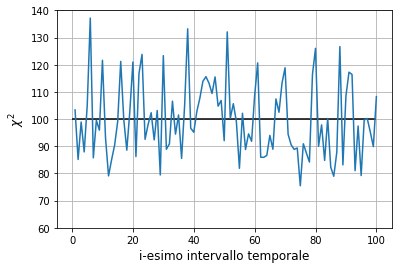

In [4]:
j, chi_j = np.loadtxt("Es01.1/risultati_01.1.3.dat", usecols=(0,1), delimiter=' ', unpack=True)

plt.plot(j,chi_j)
plt.hlines(100, 0, j[-1])
plt.xlabel('i-esimo intervallo temporale', size=12)
plt.ylabel('${\chi}^2$', size=12)
plt.ylim(60,140)
plt.grid(True)
plt.show();

Si osserva che il $\chi^2$ valutato su intervalli temporali differenti del generatore oscilla intorno al valore atteso di $100$, con oscillazioni di diversa ampiezza. I numeri generati sono distribuiti uniformemente su tutti gli intervalli considerati.

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.


#### Metodo di inversione della cumulativa

Il metodo dell'inversione della distribuzione cumulativa permette di generare una variabile che segua una generica distribuzione a partire da una variabile campionata uniformemente dell'intervallo $\left[0, 1 \right]$.

Consideriamo una variabile $x$ distribuita secondo la densità di probabilità $p_x(x)$ e definiamo la funzione cumulativa associata come:
$$F_x(x) = \int_{-\infty}^{x} p_x(x')\mathrm{d}x'.$$

Definiamo una funzione continua e monotona non decrescente $y = y(x)$, distribuita secondo $p_y(y)$. La probabilità che $x$ cada nell'intervallo $\left[x_1, x_2 \right]$ deve essere equivalante alla probabilità che $y$ cada nell'intervallo $\left[y(x_1), y(x_2) \right]$, di conseguenza possiamo scrivere $p_x(x) \mathrm{d}x = p_y(y) \mathrm{d}y$. Se invece la funzione $y = y(x)$ è non crescente l'equivalenza si scrive come $p_x(x) \mathrm{d}x = - p_y(y) \mathrm{d}y$. È dunque possibile determinare la distribuzione di probabilità di $y$ come:
$$p_y(y) = p_x(x) \cdot {\bigg| \frac{\mathrm{d}y(x)}{\mathrm{d}x} \bigg|}^{-1}.$$

Questa trasformazione è valida per qualsiasi funzione $y(x)$, tuttavia per la generazione di numeri distribuiti secondo $p_x(x)$ è opportuno scegliere come $y$ la sua distribuzione cumulativa, ponendo $y = F_x(x)$. In questo modo la variabile $y$ risulta uniformemente distribuita tra $0$ e $1$:

$$ p_{y}(y)=p_{x}(x) \cdot\left(\frac{d y}{d x}\right)^{-1}=p_{x}(x) \cdot\left(\frac{d F_{x}(x)}{d x}\right)^{-1}=p_{x}(x) \cdot\left(p_{x}(x)\right)^{-1}=\frac{p_{x}(x)}{p_{x}(x)}=1 .$$

Se la cumulativa è invertibile possiamo scrivere $x=F_x^{-1}(y)$ , ottenendo così una variabile distribuita secondo la generica distribuzione $p_x(x)$.

#### Distribuzione esponenziale


Applichiamo il metodo della trasformata per generare delle variabili distribuite esponenzialmente, con densità di probabilità:

$$ p(x) = \lambda e^{-\lambda x} ,$$

dove $\lambda$ indica il parametro di scala. L'espressione analitica della distribuzione cumulativa è data da: 

$$ F_x(x) = \int_{-\infty}^{x} \lambda e^{-\lambda x'}\mathrm{d}x' = - \lambda e^{-\lambda x'} \ \big|_0^x = 1 - e^{-\lambda x}.$$

Imponendo l'equazione $y = F_x(x)$ e quindi invertendo si ottiene una variabile $x$ distribuita esponenzialmente:

$$ x = -\frac{1}{\lambda} \ln (1-y).$$


#### Distribuzione lorentziana

Applichiamo il metodo della trasformata per generare delle variabili distribuite secondo la distribuzione di Cauchy-Lorentz, la cui densità di probabilità ha la seguente espressione:

$$ p(x) = \frac{1}{\pi} \frac{\Gamma}{(x-\mu)^2 + \Gamma^2} ,$$

dove $\mu$ e $\Gamma$ indicano rispettivamente il centro e la larghezza della distribuzione. L'espressione analitica della cumulativa è data da: 

$$ F_x(x) = \int_{-\infty}^{x} \frac{1}{\pi} \frac{\Gamma}{(x'-\mu)^2 + \Gamma^2}\mathrm{d}x' = \frac{1}{\pi} \tan^{-1} \left( \frac{x'}{\Gamma} \right) \ \bigg|_0^{x-\mu} = \frac{1}{\pi} \tan^{-1} \left( \frac{x-\mu}{\Gamma} \right) + \frac{1}{2} .$$

Dall'inversione dell'equazione $y = F_x(x)$ si ottiene una variabile $x$ distribuita secondo una lorentziana:

$$ x = \mu + \Gamma \tan \left[ \pi \left( y-\frac{1}{2} \right) \right].$$


#### Teorema del limite centrale

Questi generatori di numeri casuali possono essere utilizzati per verificare il teorema del limite centrale. Consideriamo un insieme di variabili $x_i$ indipendenti e identicamente distribuite, caratterizzate da media $\mu$ e varianza $\sigma^2$. Definiamo la media di $N$ di queste variabili come:
$$ S_N = \frac{1}{N} \sum_{i=1}^{N} x_i;$$

il teorema del limite centrale afferma che se $\sigma^2 < \infty$, allora la distribuzione di $S_N$ ha media $\mu_{S_N} = \mu$ e varianza $\sigma_{S_N}^{2} = \frac{\sigma^2}{N}$ e che per $N \rightarrow \infty$ tale distribuzione tende a una gaussiana:

$$ P_{N}\left(S_{N}\right) \underset{N \rightarrow \infty}{\longrightarrow} \frac{1}{\sqrt{2 \pi \sigma_{S_{N}}^{2}}} \exp \left[-\frac{\left(S_{N}-\mu\right)^{2}}{2 \sigma_{S_{N}}^{2}}\right] .$$



Per verificare questo teorema considero tre tipi di distribuzione: uniforme in $\left[0, 1 \right]$, esponenziale ($\lambda = 1$) e lorentziana ($\mu = 0$, $\Gamma = 1$). Per ciascuna distribuzione genero le relative variabili casuali e calcolo $n=10000$ volte la media su $N$ elementi, con $N=1, 2, 10, 100$. La distribuzione $S_1$ equivale a considerare un unico numero e quindi corrisponde alla distribuzione di partenza. Invece la distribuzione $S_{100}$ può essere considerata una buona approssimazione della distribuzione limite.

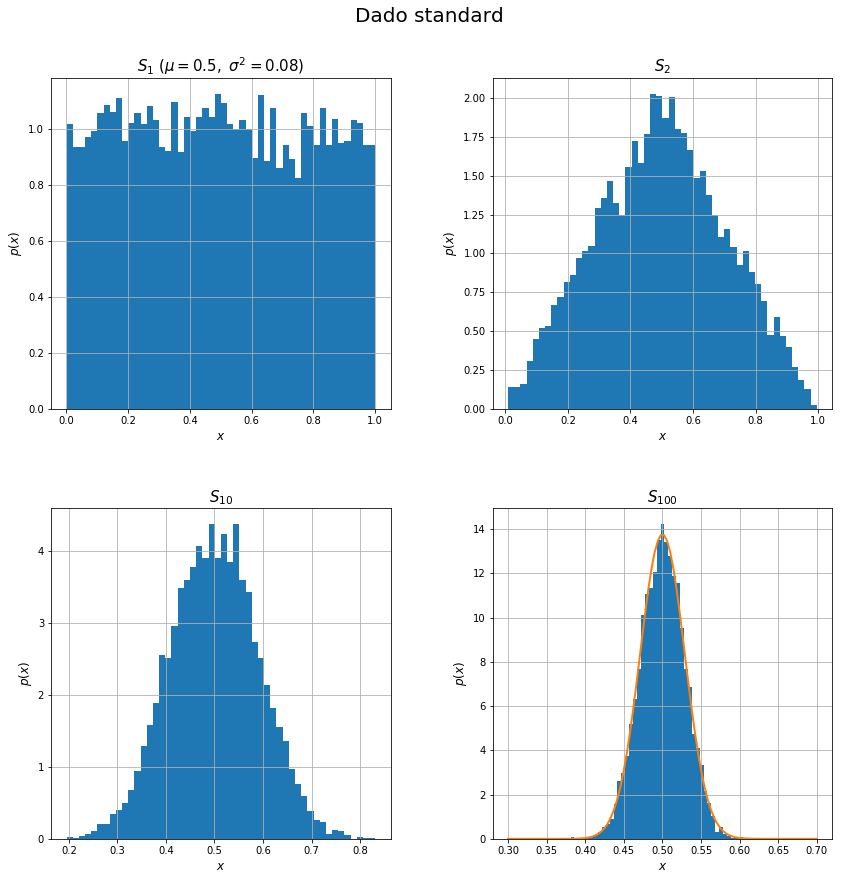

In [5]:
S1, S2, S10, S100 = np.loadtxt("Es01.2/dado_standard.dat", usecols=(0,1,2,3), delimiter=' ', unpack=True)

n_bins=50

fig = plt.figure(figsize = (14,14))
plt.suptitle("Dado standard", size=20, y=0.95)


#N=1
plt.subplot(2, 2, 1)
plt.hist(S1, n_bins, density=True)
plt.title("$S_1 \ ( \mu ={}, \ \sigma^2 = {} )$".format(round(S1.mean(),2), round(S1.var(),2)), size=15)
plt.xlabel('$x$', size=12)
plt.ylabel('$p(x)$', size=12)
plt.grid(True)


#N=2
plt.subplot(2, 2, 2)
plt.hist(S2, n_bins, density=True)
plt.title("$S_2$", size=15)
plt.xlabel('$x$', size=12)
plt.ylabel('$p(x)$', size=12)
plt.grid(True)


#N=10
plt.subplot(2, 2, 3)
plt.hist(S10, n_bins, density=True)
plt.title("$S_{10}$", size=15)
plt.xlabel('$x$', size=12)
plt.ylabel('$p(x)$', size=12)
plt.grid(True)


#N=100
plt.subplot(2, 2, 4)
plt.hist(S100, n_bins, density=True)
plt.title("$S_{100}$", size=15)
plt.xlabel('$x$', size=12)
plt.ylabel('$p(x)$', size=12)
plt.grid(True)


#fit
media,std=norm.fit(S100)
x=np.linspace(0.3, 0.7, 100)
y=norm.pdf(x, media, std)
plt.plot(x,y, lw=2)

plt.subplots_adjust(wspace=0.3, hspace=0.3)

Si osserva che $S_1$ è la distribuzione uniforme tra $0$ e $1$ con cui sono stati generati i punti $x_i$, caratterizzata da $\mu = 0.5$ e $\sigma^2 = \frac{1}{12} \approx 8 \cdot 10^{-2}$.
Al progredire di $N$ la distribuzione di $S_N$ diventa sempre più stretta mantenendo però la stessa media $\mu$.

La distribuzione di $S_{100}$ approssima bene una gaussiana, come si osserva dalla curva analitica tracciata utilizzando i parametri fittati dai dati. La varianza di questa distribuzione è $\sigma_{S_{100}}^2 \approx 8 \cdot 10^{-4} = \frac{\sigma^2}{100}$, in accordo con il teorema del limite centrale. 

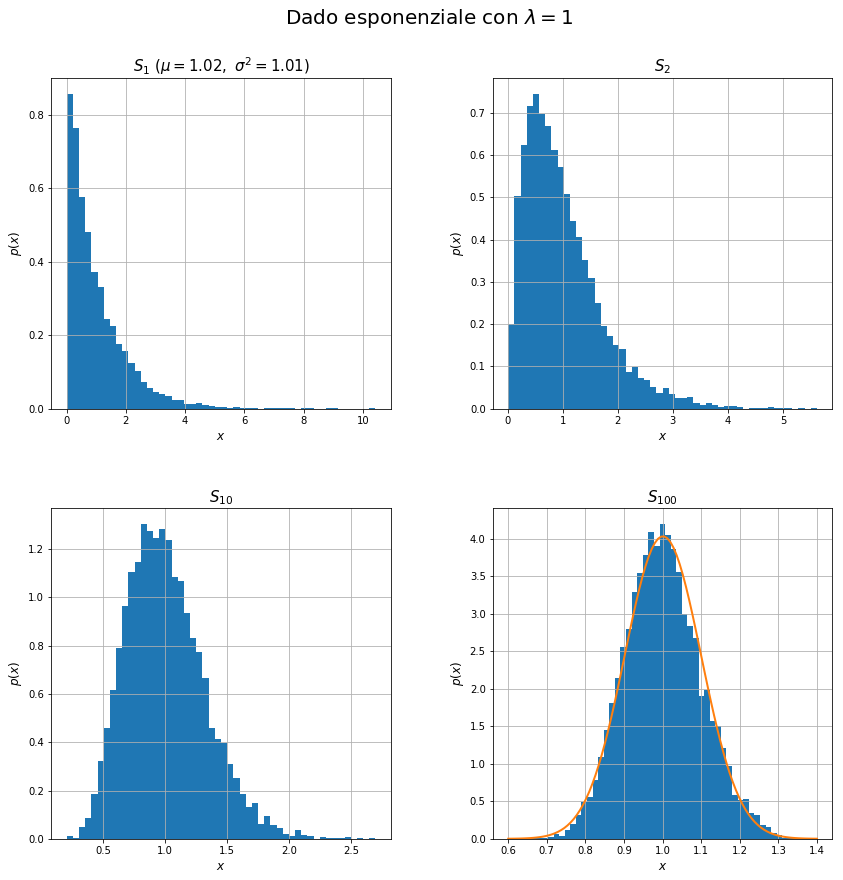

In [6]:
S1, S2, S10, S100 = np.loadtxt("Es01.2/dado_esponenziale.dat", usecols=(0,1,2,3), delimiter=' ', unpack=True)

n_bins=50

fig = plt.figure(figsize = (14,14))
plt.suptitle("Dado esponenziale con $\lambda=1$", size=20, y=0.95)


#N=1
plt.subplot(2, 2, 1)
plt.hist(S1, n_bins, density=True)
plt.title("$S_1 \ ( \mu ={}, \ \sigma^2 = {} )$".format(round(S1.mean(),2), round(S1.var(),2)), size=15)
plt.xlabel('$x$', size=12)
plt.ylabel('$p(x)$', size=12)
plt.grid(True)


#N=2
plt.subplot(2, 2, 2)
plt.hist(S2, n_bins, density=True)
plt.title("$S_2$", size=15)
plt.xlabel('$x$', size=12)
plt.ylabel('$p(x)$', size=12)
plt.grid(True)


#N=10
plt.subplot(2, 2, 3)
plt.hist(S10, n_bins, density=True)
plt.title("$S_{10}$", size=15)
plt.xlabel('$x$', size=12)
plt.ylabel('$p(x)$', size=12)
plt.grid(True)


#N=100
plt.subplot(2, 2, 4)
plt.hist(S100, n_bins, density=True)
plt.title("$S_{100}$", size=15)
plt.xlabel('$x$', size=12)
plt.ylabel('$p(x)$', size=12)
plt.grid(True)


#fit
media, std=norm.fit(S100)
x=np.linspace(0.6, 1.4, 100)
y=norm.pdf(x, media, std)
plt.plot(x,y, lw=2)

plt.subplots_adjust(wspace=0.3, hspace=0.3)

Si osserva che $S_1$ è la distribuzione esponenziale con $\lambda = 1$ con cui sono stati generati i punti $x_i$ iniziali. I valori di media e varianza sono rispettivamente $\mu = \frac{1}{\lambda} = 1$ e $\sigma^2 = \frac{1}{\lambda^2} = 1$.
Al progredire di $N$ la distribuzione di $S_N$ inizia a mostrare un picco che si restringe gradualmente.

La distribuzione di $S_{100}$ approssima bene una gaussiana, come si osserva dalla curva analitica tracciata utilizzando i parametri fittati dai dati. La varianza di questa distribuzione è $\sigma_{S_{100}}^2 \approx 9.7 \cdot 10^{-3} \approx \frac{\sigma^2}{100}$, in accordo con il teorema del limite centrale. 

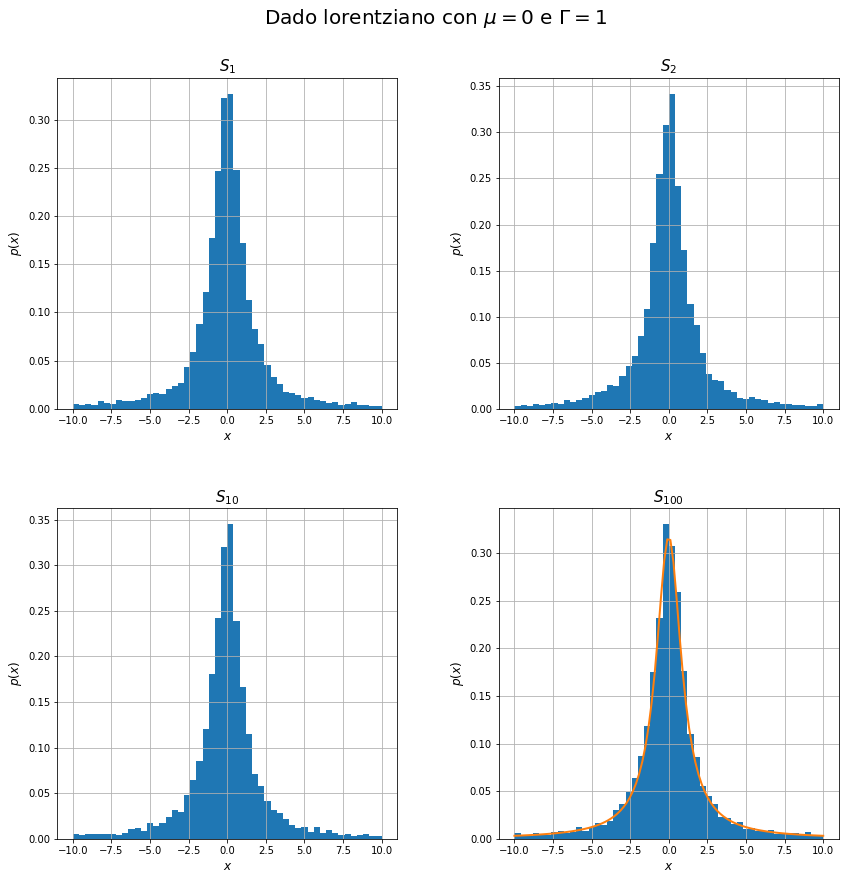

In [7]:
S1, S2, S10, S100 = np.loadtxt("Es01.2/dado_lorentziano.dat", usecols=(0,1,2,3), delimiter=' ', unpack=True)

n_bins=50

fig = plt.figure(figsize = (14,14))
plt.suptitle("Dado lorentziano con $\mu = 0$ e $\Gamma = 1$", size=20, y=0.95)


#N=1
plt.subplot(2, 2, 1)
plt.hist(S1, n_bins, range=(-10,10), density=True)
plt.title("$S_1$", size=15)
plt.xlabel('$x$', size=12)
plt.ylabel('$p(x)$', size=12)
plt.grid(True)


#N=2
plt.subplot(2, 2, 2)
plt.hist(S2, n_bins, range=(-10,10), density=True)
plt.title("$S_2$", size=15)
plt.xlabel('$x$', size=12)
plt.ylabel('$p(x)$', size=12)
plt.grid(True)


#N=10
plt.subplot(2, 2, 3)
plt.hist(S10, n_bins, range=(-10,10), density=True)
plt.title("$S_{10}$", size=15)
plt.xlabel('$x$', size=12)
plt.ylabel('$p(x)$', size=12)
plt.grid(True)


#N=100
plt.subplot(2, 2, 4)
plt.hist(S100, n_bins, range=(-10,10), density=True)
plt.title("$S_{100}$", size=15)
plt.xlabel('$x$', size=12)
plt.ylabel('$p(x)$', size=12)
plt.grid(True)


#fit
media, gamma=cauchy.fit(S100)
#print(media, gamma)
x=np.linspace(-10, 10, 100)
y=cauchy.pdf(x, media, gamma)
plt.plot(x,y,lw=2)

plt.subplots_adjust(wspace=0.3, hspace=0.3)

Si osserva che $S_1$ è la distribuzione lorentziana con cui sono stati generati i punti $x_i$ iniziali, centrata in $\mu=0$ e di larghezza $\Gamma = 1$.
Tale distribuzione ha media nulla, ma varianza infinita, pertanto non rispetta le ipotesi del teorema del limite centrale.
Di conseguenza al crescere del valore di $N$ la distribuzione di $S_N$ non tende ad una gaussiana, ma mantiene il profilo lorentziano, come si può osservare dalla curva analitica della funzione di Cauchy-Lorentz tracciata utilizzando i parametri fittati dai dati.

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

#### Esperimento di Buffon

L'esperimento dell'ago di Buffon permette di ottenere una stima del valore di $\pi$ a partire da misure effettuate con una ago.

Supponiamo di avere un piano su cui sono tracciate delle righe parallele a distanza $d$. Lanciando un ago di lunghezza $L<d$ sulla sua superficie la probabilità che esso intersechi una delle linee può essere calcolata analiticamente ed è data da $P = \frac{2L}{\pi d}$. Invertendo questa relazione si ottiene una stima del valore di $\pi$ come:
$$ \pi = \frac{2L}{Pd}.$$

#### Simulazione esperimento

Per stimare la probabilità che l'ago intersechi una linea simulo $N_{thr}$ lanci e verifico per quanti di essi, indicati con $N_{hit}$, viene intersecata una riga. La probabilità può essere dunque stimata come $P=N_{hit}/N_{thr}$ e approssimerà sempre meglio la probabilità vera al crescere del numero di lanci $N_{thr}$.

Considero un sistema di assi cartesiani con l'asse $y$ parallelo alle linee del piano e l'origine degli assi coincidente con una di esse. Se il piano è infinito il sistema è simmetrico per traslazioni lungo $y$, pertanto nel descrivere la posizione degli aghi è sufficiente utilizzare la componente $x$; inoltre poiché il piano si ripete periodicamente in direzione $x$ è possibile restringersi alla porzione con $-d/2 \le x \le d/2$.

Pertanto per simulare i lanci genero la coordinata $x_c$ del baricentro dell'ago estraendo una variabile uniforme nell'intervallo $\left[ -\frac{d}{2}, \frac{d}{2} \right]$; è inoltre necessario determinare l'angolo $\theta$ formato dall'ago e dall'asse $x$ del sistema di riferimento. Per far ciò si potrebbe generare $\theta$ secondo una distribuzione uniforme nell'intervallo $\left[ 0, 2 \pi \right]$, tuttavia questo presuppone di conoscere già il valore di $\pi$, che è la grandezza da misurare. 
Si può invece determinare univocamente l'inclinazione dell'ago osservando che i suoi estremi si dispongono su una circonferenza di raggio $L/2$ e centrata nel baricentro.

Gennero casualmente dei punti $\left( x', y' \right)$ all'interno di un quadrato di lato $L$ e seleziono solo quelli contenuti nella circonferenza inscritta: $x'^2 + y'^2 < \frac{L^2}{4}$. Questa coppia di coordinate determina un angolo da cui si ricava il corrispondente punto sulla circonferenza; la componente $x$ di quest'ultimo sarà data da:

$$ \Delta x= \frac{L}{2} \ \cos \theta = \frac{L}{2} \frac{x'}{\sqrt{x'^2 + y'^2}}.$$


In questo modo gli estremi dell'ago hanno coordinate lungo $x$ date da:
$$ x_{1,2} = x_c \pm \Delta x.$$

Ottenute le coordinate lungo le ascisse delle estremità dell'ago verifico se esso interseca una riga del piano. In particolare si ha che $x_c \in \left[ -\frac{d}{2}, \frac{d}{2} \right]$, mentre $\Delta x \in \left[ -\frac{L}{2}, \frac{L}{2} \right]$. Di conseguenza si avrà che $x_1, x_2 \in \left[ -\frac{d}{2} -\frac{L}{2}, \frac{d}{2} +\frac{L}{2} \right] \subset \left[ -d, d \right]$, dal momento che $L<d$. Pertanto l'unica linea che l'ago può intersecare è quella posizionata in $x = 0$, condizione che avviene quando i punti $x_1$ e $x_2$ hanno segno discorde.


Per simulare l'esperimento genero $M = 10^6$ lanci dell'ago, che suddivido in $N=100$ blocchi per stimare progressivamente l'errore con il metodo delle medie a blocchi.
Se $L \ll d$ la probabilità che l'ago intersechi una delle linee è molto bassa, il che comporta una lente convergenza della stima del valore di $\pi$. Pertanto scelgo in modo arbitrario i seguenti valori: $L = 0.3$ e $d = 1$.

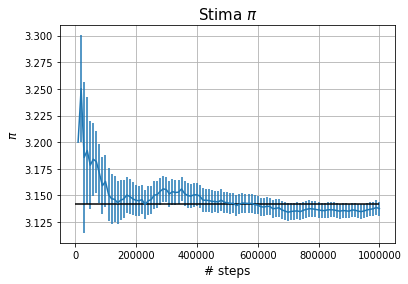

In [8]:
N, sum_prog, err_prog = np.loadtxt("Es01.3/risultati_01.3.dat", usecols=(0,1,2), delimiter=' ', unpack=True)

plt.errorbar(N,sum_prog,yerr=err_prog)
plt.xlabel('# steps', size=12)
plt.ylabel(r'$\pi$', size=12)
plt.hlines(np.pi, 0, N[-1])
plt.title('Stima $\pi$', size=15)
plt.grid(True)
plt.show();

Si osserva che dopo alcune fluttuazioni iniziali all'aumentare dei blocchi $N$ la stima del valore di $\pi$ converge al valore atteso entro $1\sigma$ e l'errore diminuisce progressivamente.

### <span style="color:blue">Computing statistical uncertainties: the blocking method</span>
- A fundamental step in every Monte Carlo calculation is the estimation of its statistical uncertainty, **it's a must!** Your task would not be completed if you had not calculated it.

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    In computing the statistical uncertainties, i.e. the standard deviation of the mean, you need an estimation of the variance $\sigma^2$, the second central moment. First of all note that the variance can be computed from
    $$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$
    What is the best way to estimate $\sigma^2_A$? Imagine that your Monte Carlo estimation of $A$ is obtained from a calculation which uses $M$ Monte Carlo "steps" (intentionally, here I am generic because what is a single "step" in a Monte Carlo calculation strictly depends on the specific calculation); you can always divide such $M$ Monte Carlo "steps" in $N$ blocks, with $N<M$. In each block, you can use your $M/N$ Monte Carlo "steps" to obtain an estimate of $A$, let me call it $A_i$ with $i=1,N$, and then you have also $A^2_i$ with $i=1,N$.
    At this point everything becomes clear:
    $$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
    and finally the statistical uncertainty with $N$ :
    $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
</p>

- <font color="blue">In a Monte Carlo calculation, you can use the arguments above to outputting an estimate of A and its statistical uncertainty on the fly, during your calculation. You will be able to do this every $M/N$ steps, and thus, in the end, $N$ times</font>. Note that after the first $M/N$ Monte Carlo steps, at the end of the first block, your estimation of the uncertainty is not computable, so set it to zero and compute it only from the second block. **Question**: $N$ can be chosen in many ways ... what are the limitations regarding this choice?